In [1]:
from math import sqrt
critics = {
    'Lisa Rose': {
        'Lady in the Water': 2.5,
        'Snakes on a Plane': 3.5,
        'Just My Luck': 3.0,
        'Superman Returns': 3.5,
        'You, Me and Dupree': 2.5,
        'The Night Listener': 3.0,
    },
    'Gene Seymour': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 3.5,
        'Just My Luck': 1.5,
        'Superman Returns': 5.0,
        'The Night Listener': 3.0,
        'You, Me and Dupree': 3.5,
    },
    'Michael Phillips': {
        'Lady in the Water': 2.5,
        'Snakes on a Plane': 3.0,
        'Superman Returns': 3.5,
        'The Night Listener': 4.0,
    },
    'Claudia Puig': {
        'Snakes on a Plane': 3.5,
        'Just My Luck': 3.0,
        'The Night Listener': 4.5,
        'Superman Returns': 4.0,
        'You, Me and Dupree': 2.5,
    },
    'Mick LaSalle': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 4.0,
        'Just My Luck': 2.0,
        'Superman Returns': 3.0,
        'The Night Listener': 3.0,
        'You, Me and Dupree': 2.0,
    },
    'Jack Matthews': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 4.0,
        'The Night Listener': 3.0,
        'Superman Returns': 5.0,
        'You, Me and Dupree': 3.5,
    },
    'Toby': {'Snakes on a Plane': 4.5, 
             'You, Me and Dupree': 1.0,
             'Superman Returns': 4.0},
}


In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
search_x = 'Superman Returns'
search_y = 'Snakes on a Plane'
label = []
x = []
y = []
for crit in critics:
    label.append(crit)
    for film in critics[crit]:
        if film == search_x:
            x.append(critics[crit][film])
        if film == search_y:
            y.append(critics[crit][film])

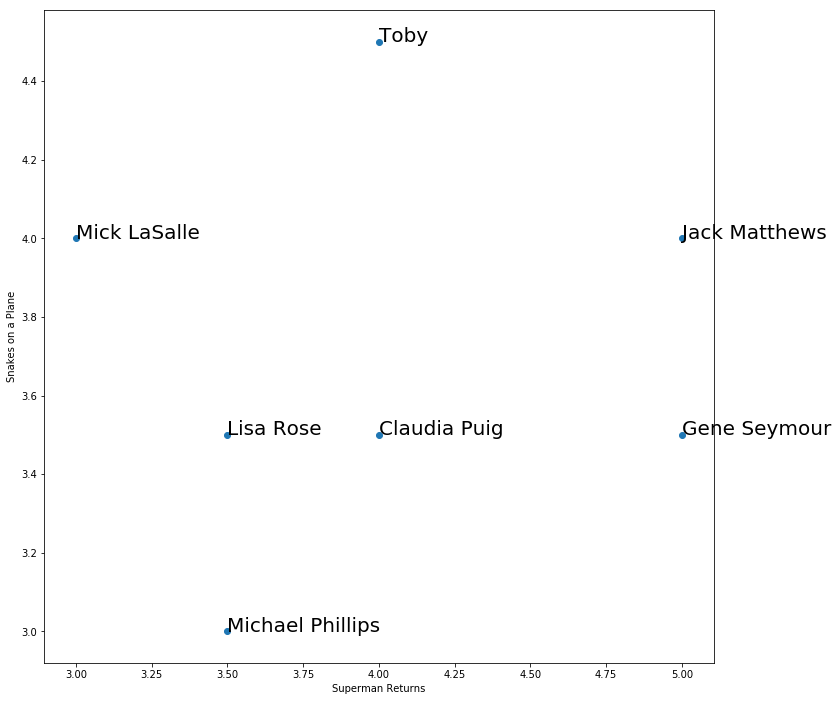

In [4]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y)
ax1.set_xlabel(search_x)
ax1.set_ylabel(search_y)
for i, txt in enumerate(label):
    ax1.annotate(txt, (x[i],y[i]),fontsize=20)
plt.show()

In [5]:
from math import sqrt
# Возвращает оценку подобия person1 и person2 на основе расстояния
def sim_distance(prefs,person1,person2):
    # Получить список предметов, оцененных обоими
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
        # Если нет ни одной общей оценки, вернуть 0
        if len(si)==0: return 0
        # Сложить квадраты разностей
        sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2)
                         for item in prefs[person1] if item in prefs[person2]])
    return (1/(1+sum_of_squares))

In [6]:
sim_distance(critics,'Michael Phillips','Mick LaSalle')

0.2857142857142857

In [7]:
search_x = 'Lisa Rose'
search_y = 'Gene Seymour'
label = []
x = []
y = []
for film in critics[search_x]:
    label.append(film)
    x.append(critics[search_x][film])
for film in critics[search_y]:
    y.append(critics[search_y][film])


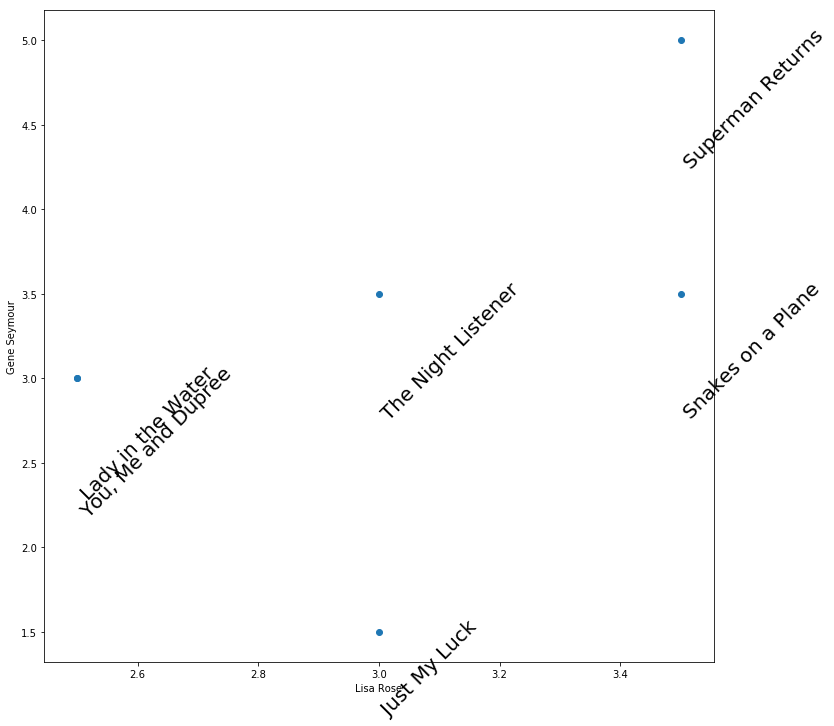

In [8]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y)
ax1.set_xlabel(search_x)
ax1.set_ylabel(search_y)
for i, txt in enumerate(label):
    ax1.annotate(txt, (x[i],y[i]),fontsize=20,rotation=45)
plt.show()

In [9]:
def sim_pearson(prefs, p1, p2):
    '''
    Возвращает коэффициент корреляции Пирсона между p1 и p2
    '''

    # Получить список предметов, оцененных обоими
    si = {}
    for item in prefs[p1]:
        if item in prefs[p2]:
            si[item] = 1
    # Если нет ни одной общей оценки, вернуть 0
    if len(si) == 0:
        return 0
    # Найти число элементов
    n = len(si)
    # Вычислить сумму всех предпочтений
    sum1 = sum([prefs[p1][it] for it in si])
    sum2 = sum([prefs[p2][it] for it in si])
    # Вычислить сумму квадратов
    sum1Sq = sum([pow(prefs[p1][it], 2) for it in si])
    sum2Sq = sum([pow(prefs[p2][it], 2) for it in si])
    # Вычислить сумму произведений
    pSum = sum([prefs[p1][it] * prefs[p2][it] for it in si])
    # Вычислить коэффициент Пирсона
    num = pSum - sum1 * sum2 / n
    den = sqrt((sum1Sq - pow(sum1, 2) / n) * (sum2Sq - pow(sum2, 2) / n))
    if den == 0:
        return 0
    r = num / den
    return (r)


In [10]:
sim_pearson(critics,'Lisa Rose','Gene Seymour')

0.39605901719066977

In [11]:
def topMatches(prefs,person,n=5,similarity=sim_pearson):
    '''
    Возвращает список наилучших соответствий для человека из словаря prefs.
    Количество результатов в списке и функция подобия – необязательные параметры.
    '''
    scores = [(similarity(prefs, person, other), other) for other in prefs
              if other != person]
    scores.sort()
    scores.reverse()
    return scores[0:n]


In [12]:
topMatches(critics,'Toby',n=3)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

In [13]:
def getRecommendations(prefs, person, similarity=sim_pearson):
    '''
    Получить рекомендации для заданного человека, пользуясь взвешенным средним
    оценок, данных всеми остальными пользователями
    '''

    totals = {}
    simSums = {}
    for other in prefs:
    #  сравнивать меня с собой же не нужно
        if other == person:
            continue
        sim = similarity(prefs, person, other)
        # игнорировать нулевые и отрицательные оценки
        if sim <= 0:
            continue
        for item in prefs[other]:
            # оценивать только фильмы, которые я еще не смотрел
            if item not in prefs[person] or prefs[person][item] == 0:
                # Коэффициент подобия * Оценка
                totals.setdefault(item, 0)
                totals[item] += prefs[other][item] * sim
                # Сумма коэффициентов подобия
                simSums.setdefault(item, 0)
                simSums[item] += sim
    # Создать нормализованный список
    rankings = [(total / simSums[item], item) for (item, total) in totals.items()]
    # Вернуть отсортированный список
    rankings.sort()
    rankings.reverse()
    return rankings

In [14]:
getRecommendations(critics,'Toby')

[(3.3477895267131017, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

In [15]:
def transformPrefs(prefs):
    result = {}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item, {})
            # Flip item and person
            result[item][person] = prefs[person][item]
    return result

In [16]:
movies=transformPrefs(critics)

In [17]:
topMatches(movies,'Superman Returns')

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]